In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import matplotlib.colors as mcolors

In [21]:
# Define the grid for plotting
x, y = np.linspace(-4, 4, 100), np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)

# Define two non-uniform Gaussian distributions with increased separation
# mu1, sigma1 = [-2, -2], [[1.5, 0.3], [0.3, 0.8]]
scale = 1.2
mu1, sigma1 = [-2, -2], [[scale * 1.5, 0.3], [0.3, scale * 0.8]]
mu2, sigma2 = [2, 2], [[0.8, -0.2], [-0.2, 1.2]]

rv1 = multivariate_normal(mu1, sigma1)
rv2 = multivariate_normal(mu2, sigma2)

# Compute density values
Z1 = rv1.pdf(np.dstack((X, Y)))
Z2 = rv2.pdf(np.dstack((X, Y)))

# Compute the color difference as the density difference
Z_diff = Z1 - Z2

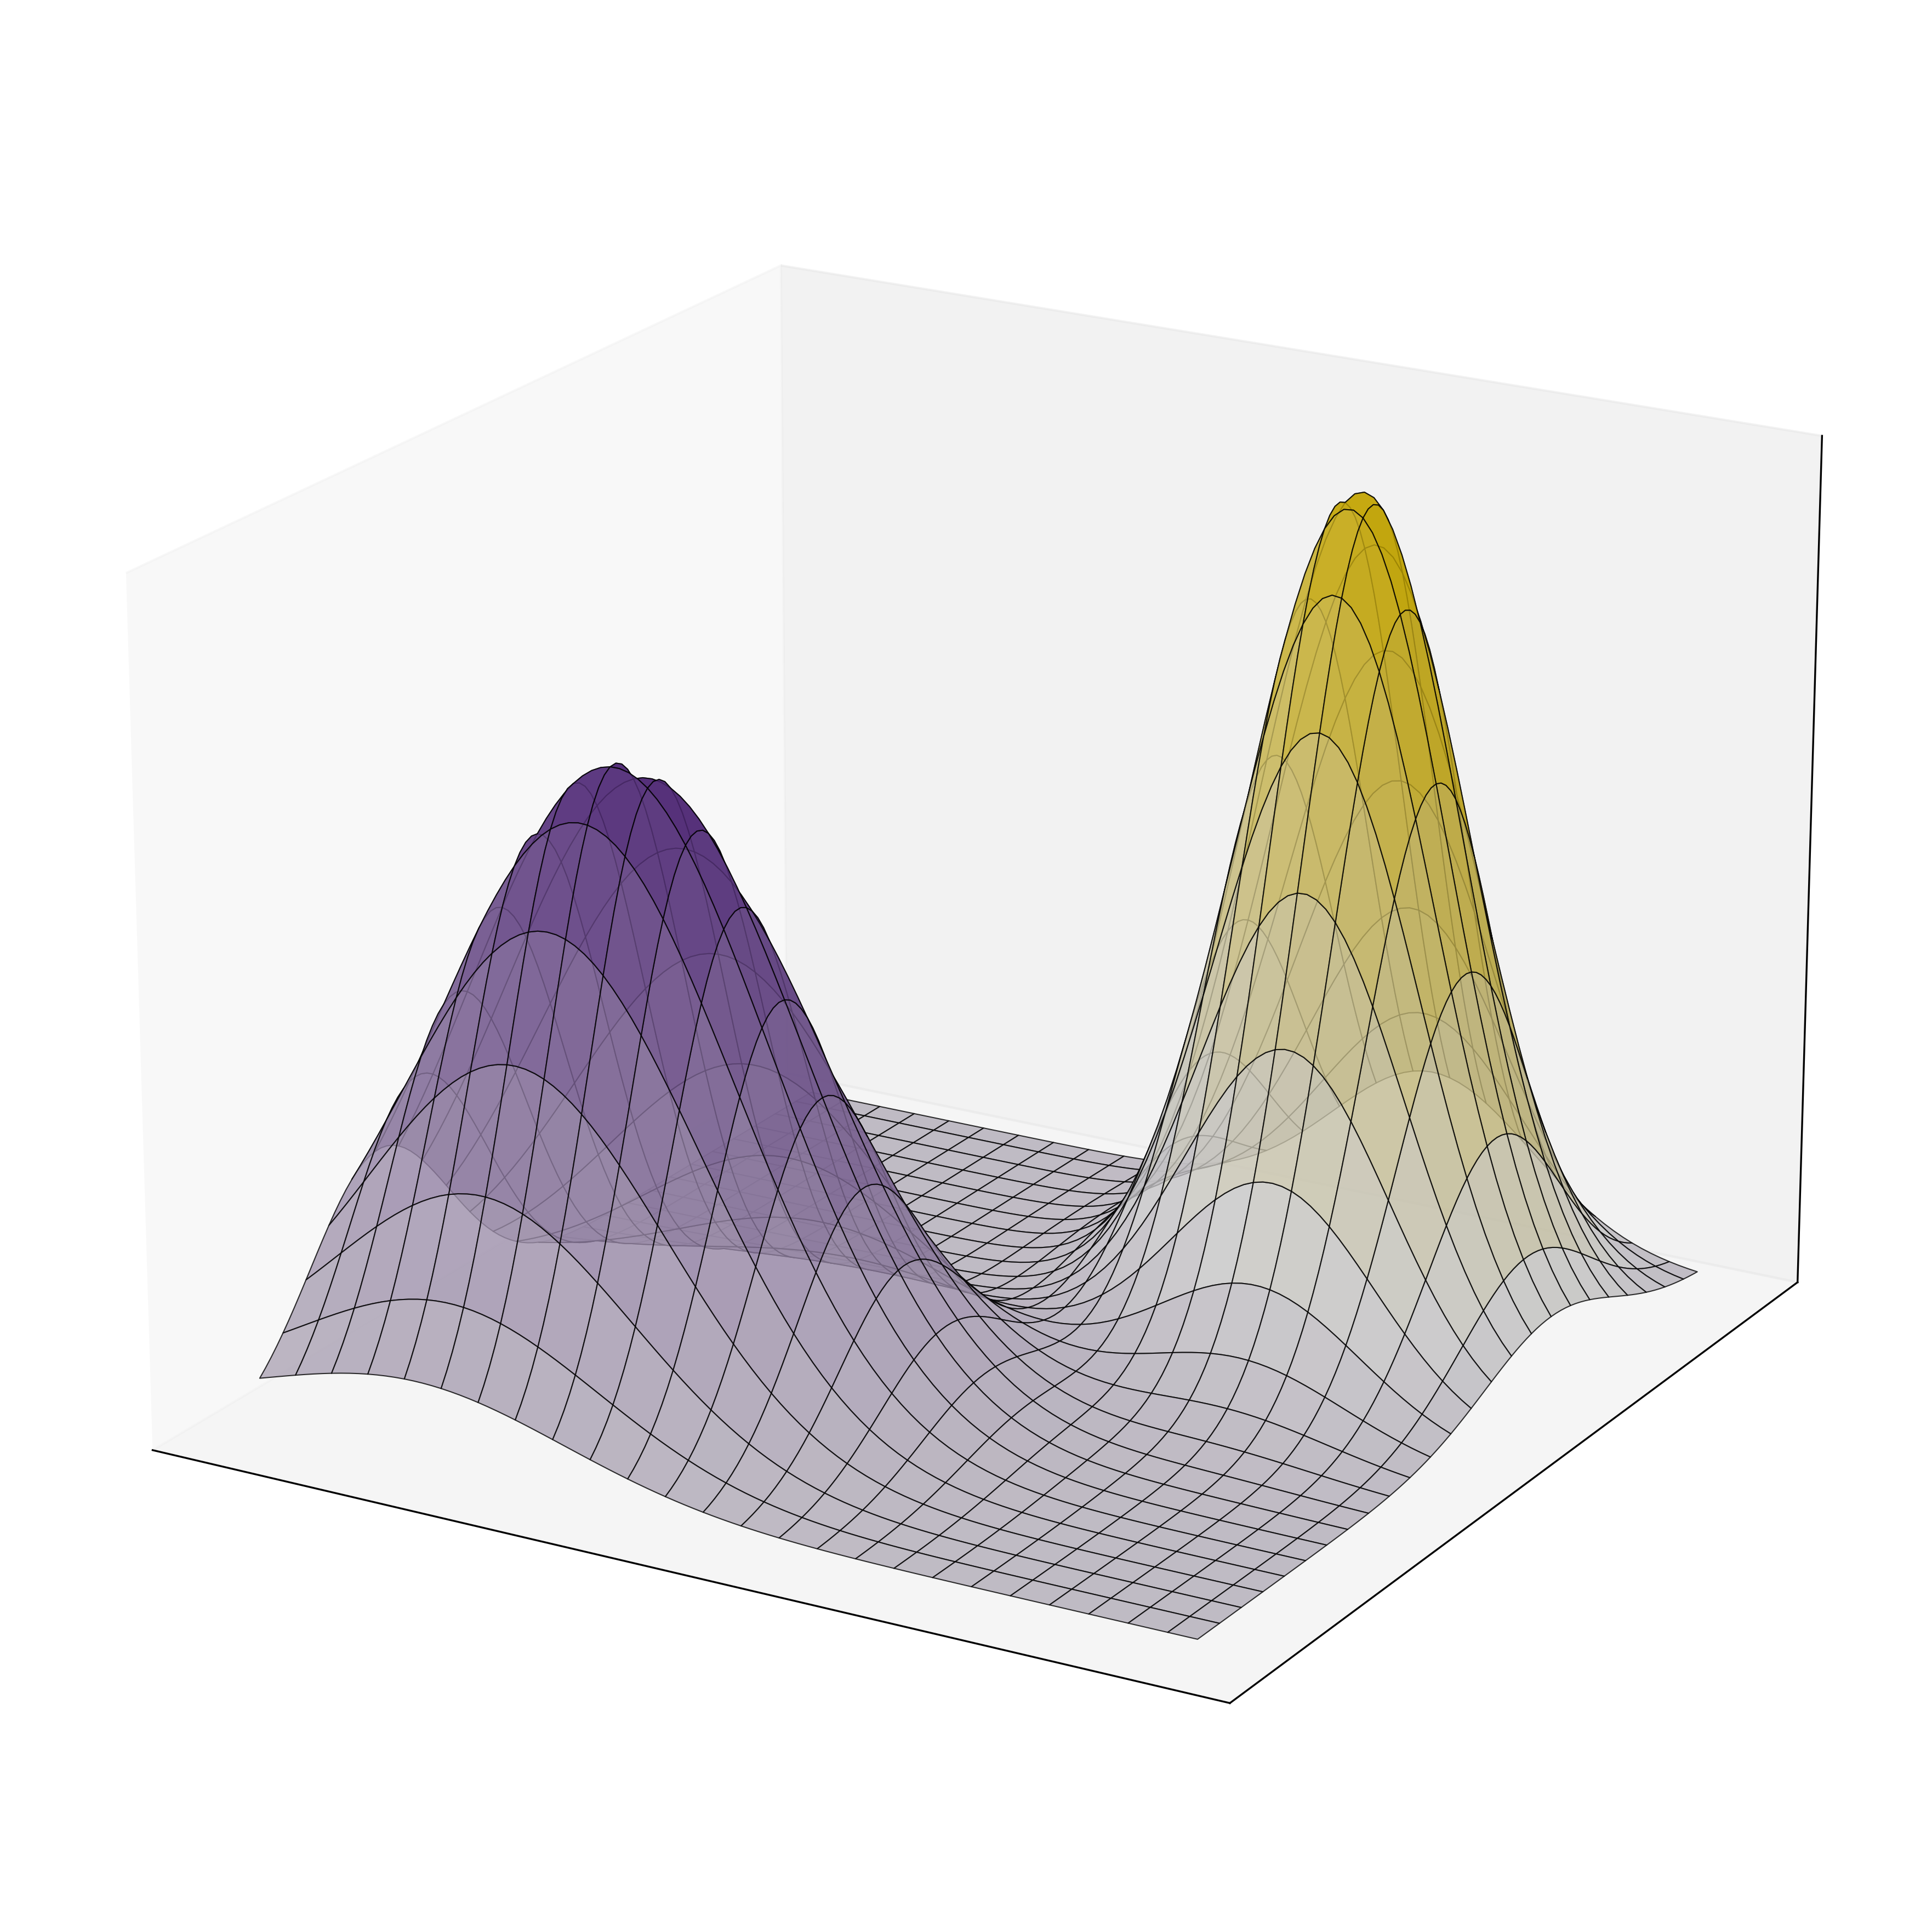

In [26]:
# Create the plot
fig = plt.figure(figsize=(20, 15), dpi=300)  # Increase figure size
ax = fig.add_subplot(111, projection='3d')

# Create a color map where positive values are red, negative are blue
# cmap = plt.cm.bwr
# cmap = plt.cm.PuOr
# cmap = plt.cm.coolwarm
colors = ["gold", "white", "rebeccapurple"]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_div_cmap", colors, N=256)

# Plot the surface with grid lines that align correctly
surf = ax.plot_surface(X, Y, Z1 + Z2, facecolors=cmap((Z_diff - Z_diff.min()) / (Z_diff.max() - Z_diff.min())), 
                        rstride=4, cstride=4, alpha=0.8, edgecolor='k', linewidth=0.5)

# Rotate the view to a more "roadside" perspective
# ax.view_init(elev=25, azim=210)
ax.view_init(elev=20)



# Labels and title
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Density')
# ax.set_title('3D Plot of Two Non-Uniform Gaussian Mixtures with Grid Lines')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Save as PNG and SVG
plt.savefig("../figures/gaussian_plot.png", dpi=300, bbox_inches='tight')
plt.savefig("../figures/gaussian_plot.svg", format='svg', bbox_inches='tight')
plt.show()
